In [12]:
import seaborn as sns
import matplotlib as mp
import numpy as np
import pandas as pd
import sklearn


In [13]:
df = pd.read_csv("steam.csv")

In [15]:
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher          platforms  \
0                   Valve                 Valve  windows;mac;linux   
1                   Valve                 Valve  windows;mac;linux   
2                   Valve                 Valve  windows;mac;linux   
3                   Valve                 Valve  windows;mac;linux   
4        Gearbox Software                 Valve  windows;mac;linux   
...                   ...                   ...                ...   
27070         SHEN JIAWEI           SHEN JIAWEI            windows   
27071      Semyon Maximov      BekkerDev Studio            windows   
27072         EntwicklerX           EntwicklerX            windows   
27073  Yustas Game Studio  Alawar Entertainment        windows;mac   
27074    Adept Studios GD  Alawar Entertainment        windows;mac   

       required_age                                         categories  \
0                 0  Multi-player;Online Multi-Player;Local Multi-P...   
1                 0  Multi-player;Online Multi-Player;Local Multi-P...   
2                 0              Multi-player;Valve Anti-Cheat enabled   
3                 0  Multi-player;Online Multi-Player;Local Multi-P...   
4                 0  Single-player;Multi-player;Valve Anti-Cheat en...   
...             ...                                                ...   
27070             0                   Single-player;Steam Achievements   
27071             0                                      Single-player   
27072             0  Single-player;Multi-player;Co-op;Shared/Split ...   
27073             0                          Single-player;Steam Cloud   
27074             0                          Single-player;Steam Cloud   

                       genres                 steamspy_tags  achievements  \
0                      Action        Action;FPS;Multiplayer             0   
1                      Action        Action;FPS;Multiplayer             0   
2                      Action  FPS;World War II;Multiplayer             0   
3                      Action        Action;FPS;Multiplayer             0   
4                      Action             FPS;Action;Sci-fi             0   
...                       ...                           ...           ...   
27070  Adventure;Casual;Indie        Adventure;Indie;Casual             7   
27071  Action;Adventure;Indie        Action;Indie;Adventure             0   
27072     Action;Casual;Indie           Action;Indie;Casual            24   
27073  Adventure;Casual;Indie        Indie;Casual;Adventure             0   
27074  Adventure;Casual;Indie        Indie;Casual;Adventure             0   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
0                124534              3339             17612              317   
1                  3318               633               277               62   
2                  3416               398               187               34   
3                  1273               267               258              184   
4                  5250               288               624              415   
...                 ...               ...               .

In [16]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [17]:
print("Shape:", df.shape)
df.info()
df.describe(include='all')


Shape: (27075, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            270

appid         name release_date       english        developer  \
count   2.707500e+04        27075        27075  27075.000000            27074   
unique           NaN        27033         2619           NaN            17112   
top              NaN  Dark Matter   2018-07-13           NaN  Choice of Games   
freq             NaN            3           64           NaN               94   
mean    5.962035e+05          NaN          NaN      0.981127              NaN   
std     2.508942e+05          NaN          NaN      0.136081              NaN   
min     1.000000e+01          NaN          NaN      0.000000              NaN   
25%     4.012300e+05          NaN          NaN      1.000000              NaN   
50%     5.990700e+05          NaN          NaN      1.000000              NaN   
75%     7.987600e+05          NaN          NaN      1.000000              NaN   
max     1.069460e+06          NaN          NaN      1.000000              NaN   

             publisher platforms  required_age     categories        genres  \
count            27061     27075  27075.000000          27075         27075   
unique           14353         7           NaN           3333          1552   
top     Big Fish Games   windows           NaN  Single-player  Action;Indie   
freq               212     18398           NaN           6110          1852   
mean               NaN       NaN      0.354903            NaN           NaN   
std                NaN       NaN      2.406044            NaN           NaN   
min                NaN       NaN      0.000000            NaN           NaN   
25%                NaN       NaN      0.000000            NaN           NaN   
50%                NaN       NaN      0.000000            NaN           NaN   
75%                NaN       NaN      0.000000            NaN           NaN   
max                NaN       NaN     18.000000            NaN           NaN   

              steamspy_tags  achievements  positive_ratings  negative_ratings  \
count                 27075  27075.000000      2.707500e+04      27075.000000   
unique                 6423           NaN               NaN               NaN   
top     Action;Indie;Casual           NaN               NaN               NaN   
freq                    845           NaN               NaN               NaN   
mean                    NaN     45.248864      1.000559e+03        211.027147   
std                     NaN    352.670281      1.898872e+04       4284.938531   
min                     NaN      0.000000      0.000000e+00          0.000000   
25%                     NaN      0.000000      6.000000e+00          2.000000   
50%                     NaN      7.000000      2.400000e+01          9.000000   
75%                     NaN     23.000000      1.260000e+02         42.000000   
max                     NaN   9821.000000      2.644404e+06     487076.000000   

        average_playtime  median_playtime   owners         price  
count       27075.000000      27075.00000    27075  27075.000000  
unique               NaN              NaN       13           NaN  
top                  NaN              NaN  0-20000           NaN  
freq                 NaN              NaN    18596           NaN  
mean          149.804949        146.05603      NaN      6.078193  
std          1827.038141       2353.88008      NaN      7.874922  
min             0.000000          0.00000      NaN      0.000000  
25%             0.000000          0.00000      NaN      1.690000  
50%             0.000000          0.00000      NaN      3.990000  
75%             0.000000          0.00000      NaN      7.190000  
max        190625.000000     190625.00000      NaN    421.990000

In [18]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_dayofweek'] = df['release_date'].dt.dayofweek


In [57]:
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher          platforms  \
0                   Valve                 Valve  windows;mac;linux   
1                   Valve                 Valve  windows;mac;linux   
2                   Valve                 Valve  windows;mac;linux   
3                   Valve                 Valve  windows;mac;linux   
4        Gearbox Software                 Valve  windows;mac;linux   
...                   ...                   ...                ...   
27070         SHEN JIAWEI           SHEN JIAWEI            windows   
27071      Semyon Maximov      BekkerDev Studio            windows   
27072         EntwicklerX           EntwicklerX            windows   
27073  Yustas Game Studio  Alawar Entertainment        windows;mac   
27074    Adept Studios GD  Alawar Entertainment        windows;mac   

       required_age                                         categories  \
0                 0  Multi-player;Online Multi-Player;Local Multi-P...   
1                 0  Multi-player;Online Multi-Player;Local Multi-P...   
2                 0              Multi-player;Valve Anti-Cheat enabled   
3                 0  Multi-player;Online Multi-Player;Local Multi-P...   
4                 0  Single-player;Multi-player;Valve Anti-Cheat en...   
...             ...                                                ...   
27070             0                   Single-player;Steam Achievements   
27071             0                                      Single-player   
27072             0  Single-player;Multi-player;Co-op;Shared/Split ...   
27073             0                          Single-player;Steam Cloud   
27074             0                          Single-player;Steam Cloud   

                       genres  ... achievements  positive_ratings  \
0                      Action  ...            0            124534   
1                      Action  ...            0              3318   
2                      Action  ...            0              3416   
3                      Action  ...            0              1273   
4                      Action  ...            0              5250   
...                       ...  ...          ...               ...   
27070  Adventure;Casual;Indie  ...            7                 3   
27071  Action;Adventure;Indie  ...            0                 8   
27072     Action;Casual;Indie  ...           24                 0   
27073  Adventure;Casual;Indie  ...            0                 2   
27074  Adventure;Casual;Indie  ...            0                 4   

       negative_ratings  average_playtime  median_playtime             owners  \
0                  3339             17612              317  10000000-20000000   
1                   633               277               62   5000000-10000000   
2                   398               187               34   5000000-10000000   
3                   267               258              184   5000000-10000000   
4                   288               624              415   5000000-10000000   
...                 ...               ...              ...                ...   
27070                 0                 0                0        

In [58]:
df['genres'].unique()

array(['Action', 'Action;Free to Play', 'Action;Free to Play;Strategy',
       ...,
       'Action;Adventure;Indie;Massively Multiplayer;RPG;Strategy;Early Access',
       'Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy',
       'Casual;Free to Play;Massively Multiplayer;RPG;Early Access'],
      shape=(1552,), dtype=object)

In [59]:
df['genres'].nunique()

1552

In [60]:
df['platforms'].unique()

array(['windows;mac;linux', 'windows;mac', 'windows', 'windows;linux',
       'mac', 'mac;linux', 'linux'], dtype=object)

In [61]:
df['platforms'].nunique()#here dince entries inside platform are delimited or list within list therefore we will do first som modification

7

In [62]:
df['genres'] = df['genres'].fillna('')# this is use to  fill those values which are NA an change it to an empty string " "
all_genres = df['genres'].str.split(';').explode()# before split df['genres'] = ['Action;Adventure', 'RPG', 'Indie;Casual']
                                                ## after split   df['genres'].str.split(';') = [['Action', 'Adventure'], ['RPG'], ['Indie', 'Casual']]
# split at ; means the strings which are seperated by ; become  alist seperated by commas
# explode changes breaks list inside bigger lists  ie [[action,adventure],indie] change sto [action,adventure,indie]


#unique  ponly keeps the unique terms



In [63]:
unique_genres

array(['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG',
       'Animation & Modeling', 'Video Production', 'Casual', 'Simulation',
       'Racing', 'Violent', 'Massively Multiplayer', 'Nudity', 'Sports',
       'Early Access', 'Gore', 'Utilities', 'Design & Illustration',
       'Web Publishing', 'Education', 'Software Training',
       'Sexual Content', 'Audio Production', 'Game Development',
       'Photo Editing', 'Accounting', 'Documentary', 'Tutorial'],
      dtype=object)

In [64]:
unique_genres_count = all_genres.nunique()# gives number of unique values

In [65]:
unique_genres_count

29

In [66]:
# since there are 29 unique categories it is not feasible to  categorise everything using  one hot encoding in all these 29 genres

In [67]:
df['platforms']= df['platforms'].fillna(' ')

In [68]:
all_platforms =df['platforms'].str.split(';').explode()
unique_platforms =all_platforms.unique()

In [69]:
unique_platforms

array(['windows', 'mac', 'linux'], dtype=object)

In [70]:
# since there are only three in  platforms we csn use one hot encoding here

In [71]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price',
       'release_year', 'release_month', 'release_dayofweek'],
      dtype='object')

In [72]:
df['categories']= df['categories'].fillna(' ')
all_categories =df['categories'].str.split(';').explode()
unique_categories =all_categories.unique()
unique_categories

array(['Multi-player', 'Online Multi-Player', 'Local Multi-Player',
       'Valve Anti-Cheat enabled', 'Single-player', 'Steam Cloud',
       'Steam Achievements', 'Steam Trading Cards', 'Captions available',
       'Partial Controller Support', 'Includes Source SDK',
       'Cross-Platform Multiplayer', 'Stats', 'Commentary available',
       'Includes level editor', 'Steam Workshop', 'In-App Purchases',
       'Co-op', 'Full controller support', 'Steam Leaderboards',
       'SteamVR Collectibles', 'Online Co-op', 'Shared/Split Screen',
       'Local Co-op', 'MMO', 'VR Support', 'Mods', 'Mods (require HL2)',
       'Steam Turn Notifications'], dtype=object)

In [73]:
# since this also has too many labels this also cannot be one hot encodede

In [74]:

df['platforms'] = df['platforms'].str.split(';')

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
platform_dummies = pd.DataFrame(mlb.fit_transform(df['platforms']), columns=mlb.classes_, index=df.index)

df = pd.concat([df, platform_dummies], axis=1)

In [75]:
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher              platforms  \
0                   Valve                 Valve  [windows, mac, linux]   
1                   Valve                 Valve  [windows, mac, linux]   
2                   Valve                 Valve  [windows, mac, linux]   
3                   Valve                 Valve  [windows, mac, linux]   
4        Gearbox Software                 Valve  [windows, mac, linux]   
...                   ...                   ...                    ...   
27070         SHEN JIAWEI           SHEN JIAWEI              [windows]   
27071      Semyon Maximov      BekkerDev Studio              [windows]   
27072         EntwicklerX           EntwicklerX              [windows]   
27073  Yustas Game Studio  Alawar Entertainment         [windows, mac]   
27074    Adept Studios GD  Alawar Entertainment         [windows, mac]   

       required_age                                         categories  \
0                 0  Multi-player;Online Multi-Player;Local Multi-P...   
1                 0  Multi-player;Online Multi-Player;Local Multi-P...   
2                 0              Multi-player;Valve Anti-Cheat enabled   
3                 0  Multi-player;Online Multi-Player;Local Multi-P...   
4                 0  Single-player;Multi-player;Valve Anti-Cheat en...   
...             ...                                                ...   
27070             0                   Single-player;Steam Achievements   
27071             0                                      Single-player   
27072             0  Single-player;Multi-player;Co-op;Shared/Split ...   
27073             0                          Single-player;Steam Cloud   
27074             0                          Single-player;Steam Cloud   

                       genres  ... average_playtime  median_playtime  \
0                      Action  ...            17612              317   
1                      Action  ...              277               62   
2                      Action  ...              187               34   
3                      Action  ...              258              184   
4                      Action  ...              624              415   
...                       ...  ...              ...              ...   
27070  Adventure;Casual;Indie  ...                0                0   
27071  Action;Adventure;Indie  ...                0                0   
27072     Action;Casual;Indie  ...                0                0   
27073  Adventure;Casual;Indie  ...                0                0   
27074  Adventure;Casual;Indie  ...                0                0   

                  owners  price  release_year  release_month  \
0      10000000-20000000   7.19          2000             11   
1       5000000-10000000   3.99          1999              4   
2       5000000-10000000   3.99          2003              5   
3       5000000-10000000   3.99          2001              6   
4       5000000-10000000   3.99          1999             11   
...                  ...    ...           ...            ...   
27070            0-20000   2.09          2019              4   
27071            0-20000   1.69      

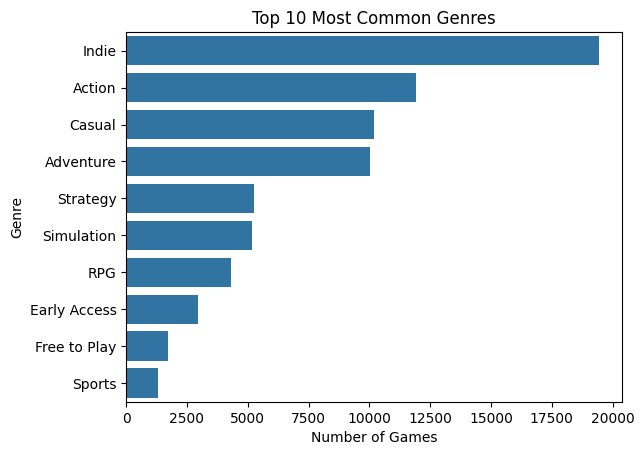

In [78]:
import matplotlib.pyplot as plt

df['genres'] = df['genres'].fillna('')
df['genre_list'] = df['genres'].str.split(';')
all_genres = df['genre_list'].explode()
mostplayedgenres = all_genres.value_counts().head(10)

sns.barplot(x=top_genres.values, y=mostplayedgenres.index)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.show()

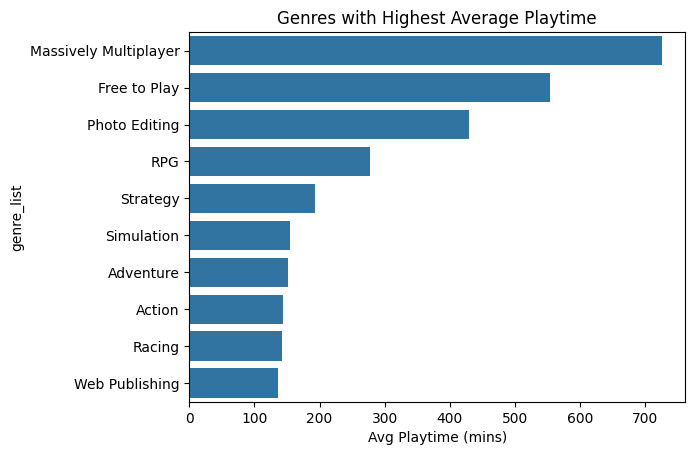

In [79]:
genre_playtime = df[['genre_list', 'average_playtime']].explode('genre_list')
genre_avg_play = genre_playtime.groupby('genre_list')['average_playtime'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=genre_avg_play.values, y=genre_avg_play.index)
plt.title("Genres with Highest Average Playtime")
plt.xlabel("Avg Playtime (mins)")
plt.show()

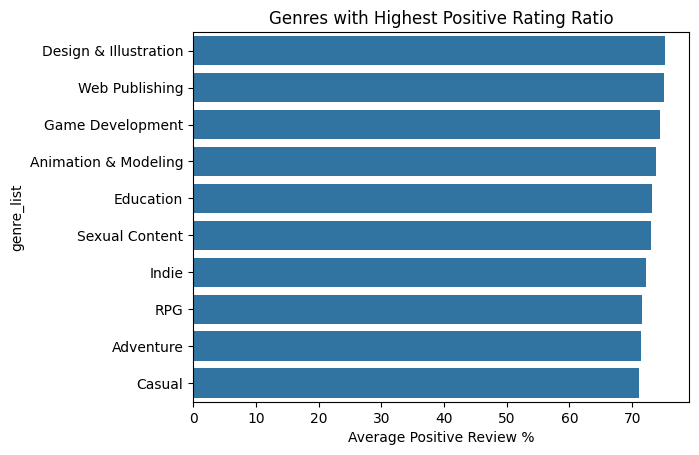

In [109]:
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
df['positive_ratio'] = df['positive_ratings'] / df['total_ratings'].replace(0, np.nan)

genre_ratio = df[['genre_list', 'positive_ratio']].explode('genre_list')
genre_avg_rating = genre_ratio.groupby('genre_list')['positive_ratio'].mean() * 100
genre_avg_rating = genre_avg_rating.sort_values(ascending=False).head(10)


sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index)
plt.title("Genres with Highest Positive Rating Ratio")
plt.xlabel("Average Positive Review %")
plt.show()

In [129]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

df['release_season'] = df['release_month'].apply(get_season)


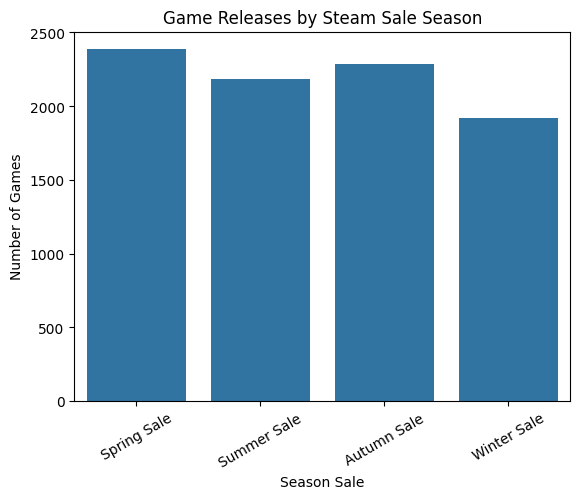

In [130]:

sns.countplot(data=df, x='season_sale', order=['Spring Sale', 'Summer Sale', 'Autumn Sale', 'Winter Sale'])
plt.title("Game Releases by Steam Sale Season")
plt.xlabel("Season Sale")
plt.ylabel("Number of Games")
plt.xticks(rotation=30)
plt.show()


In [131]:
numeric_cols = ['price', 'average_playtime', 'positive_ratings',
                'negative_ratings', 'total_ratings']

In [135]:
from sklearn.preprocessing import MinMaxScaler#NORMALISATION

minmax = MinMaxScaler()
df_normalized = pd.DataFrame(
    minmax.fit_transform(df[numeric_cols]),
    columns=[col + '_norm' for col in numeric_cols],
    index=df.index
)

In [136]:
from sklearn.preprocessing import StandardScaler# STANDARDISATION

scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=[col + '_std' for col in numeric_cols],
    index=df.index
)

In [152]:
df = pd.concat([df, df_standardized,df_normalized], axis=1)

In [153]:
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher              platforms  \
0                   Valve                 Valve  [windows, mac, linux]   
1                   Valve                 Valve  [windows, mac, linux]   
2                   Valve                 Valve  [windows, mac, linux]   
3                   Valve                 Valve  [windows, mac, linux]   
4        Gearbox Software                 Valve  [windows, mac, linux]   
...                   ...                   ...                    ...   
27070         SHEN JIAWEI           SHEN JIAWEI              [windows]   
27071      Semyon Maximov      BekkerDev Studio              [windows]   
27072         EntwicklerX           EntwicklerX              [windows]   
27073  Yustas Game Studio  Alawar Entertainment         [windows, mac]   
27074    Adept Studios GD  Alawar Entertainment         [windows, mac]   

       required_age  categories  genres                 steamspy_tags  \
0                 0         NaN     NaN        Action;FPS;Multiplayer   
1                 0         NaN     NaN        Action;FPS;Multiplayer   
2                 0         NaN     NaN  FPS;World War II;Multiplayer   
3                 0         NaN     NaN        Action;FPS;Multiplayer   
4                 0         NaN     NaN             FPS;Action;Sci-fi   
...             ...         ...     ...                           ...   
27070             0         NaN     NaN        Adventure;Indie;Casual   
27071             0         NaN     NaN        Action;Indie;Adventure   
27072             0         NaN     NaN           Action;Indie;Casual   
27073             0         NaN     NaN        Indie;Casual;Adventure   
27074             0         NaN     NaN        Indie;Casual;Adventure   

       achievements  positive_ratings  negative_ratings  average_playtime  \
0                 0            124534              3339             17612   
1                 0              3318               633               277   
2                 0              3416               398               187   
3                 0              1273               267               258   
4                 0              5250               288               624   
...             ...               ...               ...               ...   
27070             7                 3                 0                 0   
27071             0                 8                 1                 0   
27072            24                 0                 1                 0   
27073             0                 2                 0                 0   
27074             0                 4                 0                 0   

       ...  total_ratings positive_ratio                              tags  \
0      ...         127873       0.973888        [Action, FPS, Multiplayer]   
1      ...           3951       0.839787        [Action, FPS, Multiplayer]   
2      ...           3814       0.895648  [FPS, World War II, Multiplayer]   
3      ...           1540       0.826623        [Action, FPS, Multiplayer]   
4      ...           5538       0.947996             [FPS, Action, Sci-fi]   
...    ...            ...        

In [157]:
pd.set_option('display.max_columns',40)

In [158]:
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher              platforms  \
0                   Valve                 Valve  [windows, mac, linux]   
1                   Valve                 Valve  [windows, mac, linux]   
2                   Valve                 Valve  [windows, mac, linux]   
3                   Valve                 Valve  [windows, mac, linux]   
4        Gearbox Software                 Valve  [windows, mac, linux]   
...                   ...                   ...                    ...   
27070         SHEN JIAWEI           SHEN JIAWEI              [windows]   
27071      Semyon Maximov      BekkerDev Studio              [windows]   
27072         EntwicklerX           EntwicklerX              [windows]   
27073  Yustas Game Studio  Alawar Entertainment         [windows, mac]   
27074    Adept Studios GD  Alawar Entertainment         [windows, mac]   

       required_age  categories  genres                 steamspy_tags  \
0                 0         NaN     NaN        Action;FPS;Multiplayer   
1                 0         NaN     NaN        Action;FPS;Multiplayer   
2                 0         NaN     NaN  FPS;World War II;Multiplayer   
3                 0         NaN     NaN        Action;FPS;Multiplayer   
4                 0         NaN     NaN             FPS;Action;Sci-fi   
...             ...         ...     ...                           ...   
27070             0         NaN     NaN        Adventure;Indie;Casual   
27071             0         NaN     NaN        Action;Indie;Adventure   
27072             0         NaN     NaN           Action;Indie;Casual   
27073             0         NaN     NaN        Indie;Casual;Adventure   
27074             0         NaN     NaN        Indie;Casual;Adventure   

       achievements  positive_ratings  negative_ratings  average_playtime  \
0                 0            124534              3339             17612   
1                 0              3318               633               277   
2                 0              3416               398               187   
3                 0              1273               267               258   
4                 0              5250               288               624   
...             ...               ...               ...               ...   
27070             7                 3                 0                 0   
27071             0                 8                 1                 0   
27072            24                 0                 1                 0   
27073             0                 2                 0                 0   
27074             0                 4                 0                 0   

       median_playtime             owners  price  release_year  release_month  \
0                  317  10000000-20000000   7.19          2000             11   
1                   62   5000000-10000000   3.99          1999              4   
2                   34   5000000-10000000   3.99          2003              5   
3                  184   5000000-10000000   3.99          2001              6   
4                  415   5000000-10000000   3.99          1999             11   
...            

In [159]:
df.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher              platforms  required_age  categories  genres  \
0     Valve  [windows, mac, linux]             0         NaN     NaN   
1     Valve  [windows, mac, linux]             0         NaN     NaN   
2     Valve  [windows, mac, linux]             0         NaN     NaN   
3     Valve  [windows, mac, linux]             0         NaN     NaN   
4     Valve  [windows, mac, linux]             0         NaN     NaN   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  release_year  release_month  release_dayofweek  linux  mac  windows  \
0   7.19          2000             11                  2      1    1        1   
1   3.99          1999              4                  3      1    1        1   
2   3.99          2003              5                  3      1    1        1   
3   3.99          2001              6                  4      1    1        1   
4   3.99          1999             11                  0      1    1        1   

  genre_list  total_ratings  positive_ratio                              tags  \
0   [Action]         127873        0.973888        [Action, FPS, Multiplayer]   
1   [Action]           3951        0.839787        [Action, FPS, Multiplayer]   
2   [Action]           3814        0.895648  [FPS, World War II, Multiplayer]   
3   [Action]           1540        0.826623        [Action, FPS, Multiplayer]   
4   [Action]           5538        0.947996             [FPS, Action, Sci-fi]   

   season_sale release_season  price_std  average_playtime_std  \
0  Autumn Sale         Autumn   0.141186              9.557829   
1  Spring Sale         Spring  -0.265175              0.069619   
2         None         Spring  -0.265175              0.020358   
3         None         Summer  -0.265175              0.059220   
4  Autumn Sale         Autumn  -0.265175              0.259548   

   positive_ratings_std  negative_ratings_std  total_ratings_std  price_norm  \
0              6.505741              0.730006           5.647297    0.017038   
1              0.122045              0.098480           0.122139    0.009455   
2              0.127206              0.043636           0.116031    0.009455   
3              0.014348              0.013063           0.014643    0.009455   
4              0.223792              0.017964           0.192897    0.009455   

   average_playtime_norm  positive_ratings_norm  negative_ratings_norm  \
0               0.092391               0.047093               0.006855   
1               0.001453               0.001255               0.001300   
2               0.000981               0.001292               0.000817   
3               0.001353               0.000481               0.000548   
4      

In [160]:
# so till now we have standardised , normalized using min max , changed everything to date , month , year format ,  we have categorized into summer , winter , autmn, spirng sales, we have found trends between price ratings,and sales


In [161]:
df['is_free'] = (df['price'] == 0).astype(int)
df['adjusted_score'] = (df['positive_ratings'] + 1) / (df['total_ratings'] + 2)

In [162]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price',
       'release_year', 'release_month', 'release_dayofweek', 'linux', 'mac',
       'windows', 'genre_list', 'total_ratings', 'positive_ratio', 'tags',
       'season_sale', 'release_season', 'price_std', 'average_playtime_std',
       'positive_ratings_std', 'negative_ratings_std', 'total_ratings_std',
       'price_norm', 'average_playtime_norm', 'positive_ratings_norm',
       'negative_ratings_norm', 'total_ratings_norm', 'is_free',
       'adjusted_score'],
      dtype='object')

C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\3494921854.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="coolwarm")


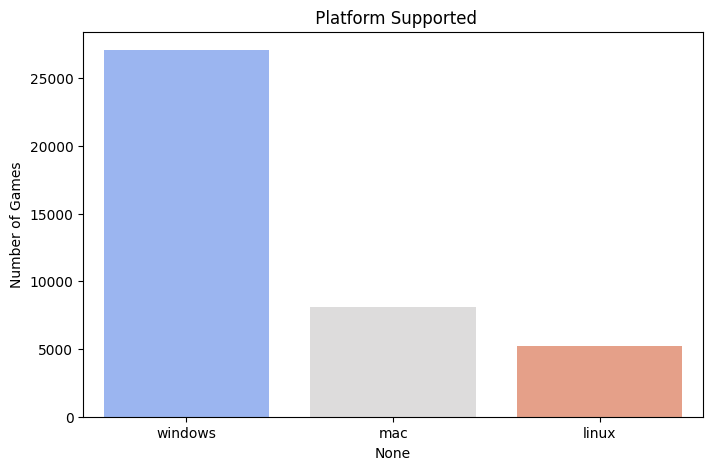

In [163]:
platforms = ['windows', 'mac', 'linux']
platform_counts = df[platforms].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="coolwarm")
plt.title(" Platform Supported")
plt.ylabel("Number of Games")
plt.show()


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\2292921340.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_adjusted.values * 100, y=top_adjusted.index, palette="magma")


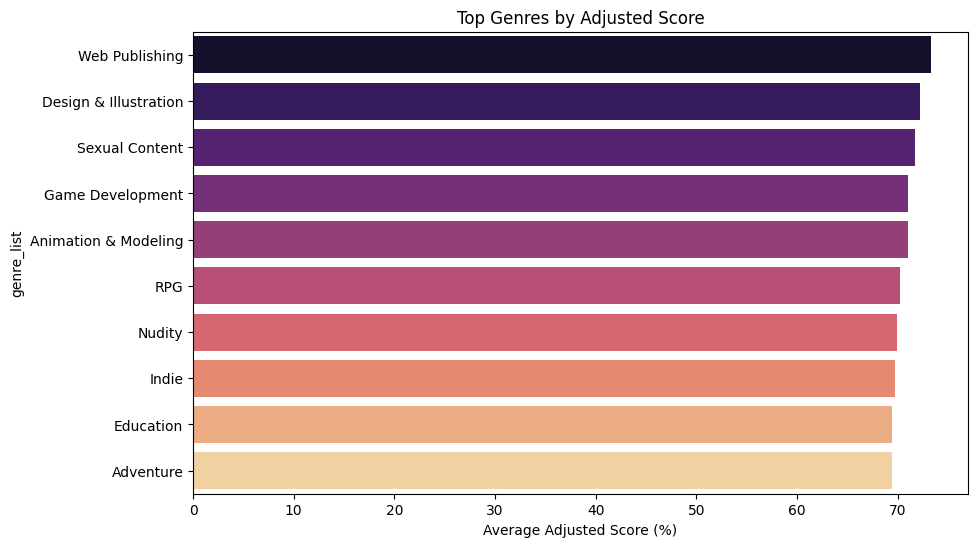

In [164]:
genre_rating = df[['genre_list', 'adjusted_score']].explode('genre_list')
top_adjusted = genre_rating.groupby('genre_list')['adjusted_score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_adjusted.values * 100, y=top_adjusted.index, palette="magma")
plt.title("Top Genres by Adjusted Score")
plt.xlabel("Average Adjusted Score (%)")
plt.show()

C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\789599073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='owners', order=df['owners'].value_counts().index[:10], palette='Set2')
C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


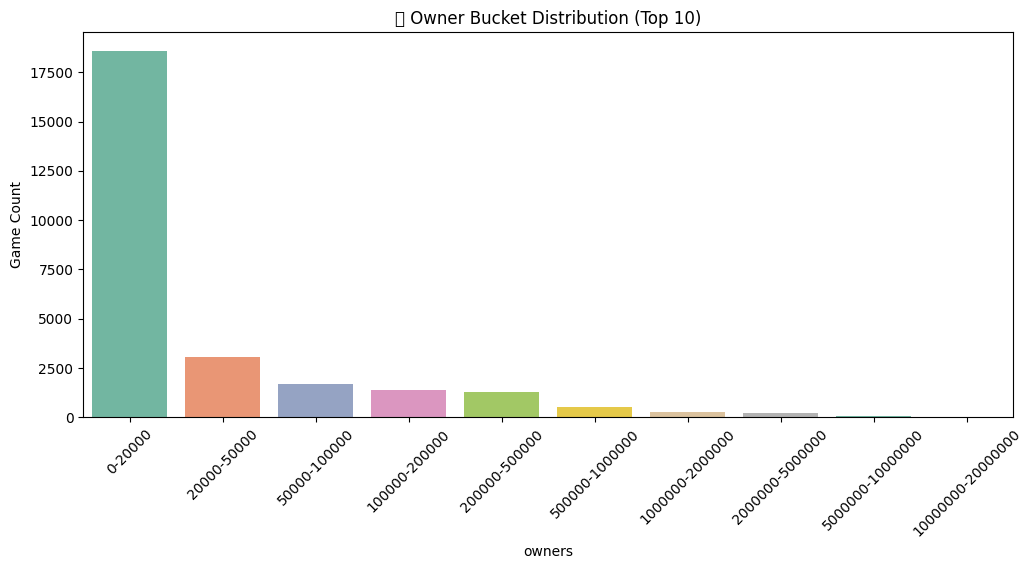

In [165]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='owners', order=df['owners'].value_counts().index[:10], palette='Set2')
plt.xticks(rotation=45)
plt.title("👥 Owner Bucket Distribution (Top 10)")
plt.ylabel("Game Count")
plt.show()

In [166]:
#from the above grapph it is clear that  very few games have a player bas eof 10 to 20 million

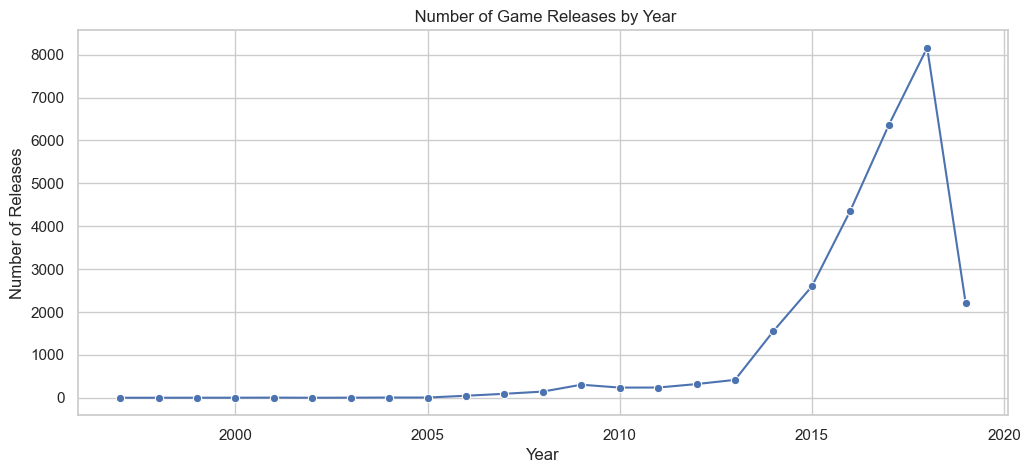

In [235]:
release_years = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=release_years.index, y=release_years.values, marker="o")
plt.title(" Number of Game Releases by Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()

In [223]:
df['developer'].value_counts().head(20)

developer
Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
Humongous Entertainment       36
For Kids                      36
EnsenaSoft                    35
Nekyau Games                  32
Eipix Entertainment           32
Warfare Studios               31
HeR Interactive               30
MumboJumbo                    29
Creobit                       28
ERS G Studios                 28
HexWar Games                  27
Name: count, dtype: int64

In [227]:
df[df['release_year'] == 2017]['developer'].value_counts().head(10)
df[df['release_year'] == 2017]['windows'].value_counts().head(10)


windows
1    6354
0       3
Name: count, dtype: int64

In [228]:
df[df['release_year'] == 2016]['windows'].value_counts().head(10)


windows
1    4361
Name: count, dtype: int64

In [229]:
df[df['release_year'] == 2015]['windows'].value_counts().head(10)

windows
1    2597
Name: count, dtype: int64

In [231]:
df[df['release_year'] == 2016]['developer'].value_counts().head(10)

developer
EnsenaSoft                               29
Choice of Games                          14
United Independent Entertainment GmbH    11
Just1337 Studio                          11
Eipix Entertainment                      11
VIS-Games                                10
Hosted Games                             10
Dogenzaka Lab                             9
Creobit                                   8
Frontwing                                 8
Name: count, dtype: int64

In [232]:
df[df['release_year'] == 2017]['developer'].value_counts().head(10)

developer
KOEI TECMO GAMES CO., LTD.    38
Choice of Games               26
Ripknot Systems               19
Dexion Games                  17
For Kids                      16
HexWar Games                  16
baKno Games                   15
Vyacheslav Shilikhin          14
Eipix Entertainment           14
Warfare Studios               12
Name: count, dtype: int64

In [233]:
df[df['release_year'] == 2018]['developer'].value_counts().head(10)

developer
Ripknot Systems             42
Laush Dmitriy Sergeevich    40
Nikita "Ghost_RUS"          39
Nekyau Games                32
Choice of Games             27
Red Dolphin Games           23
RewindApp                   22
Dexion Games                21
For Kids                    20
Garnudo Games               20
Name: count, dtype: int64

In [234]:
df[df['release_year'] == 2019]['developer'].value_counts().head(10)

developer
RewindApp                13
Blender Games             9
LTrust                    8
Dexion Games              7
e-FunSoft Games           7
Kiddy                     7
Tuwi Michael Nannings     6
Lazy Turtle Games         5
Zloy Krot Studio          5
indie_games_studio        5
Name: count, dtype: int64

C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\2113880646.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\2113880646.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\2113880646.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\2113880646.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

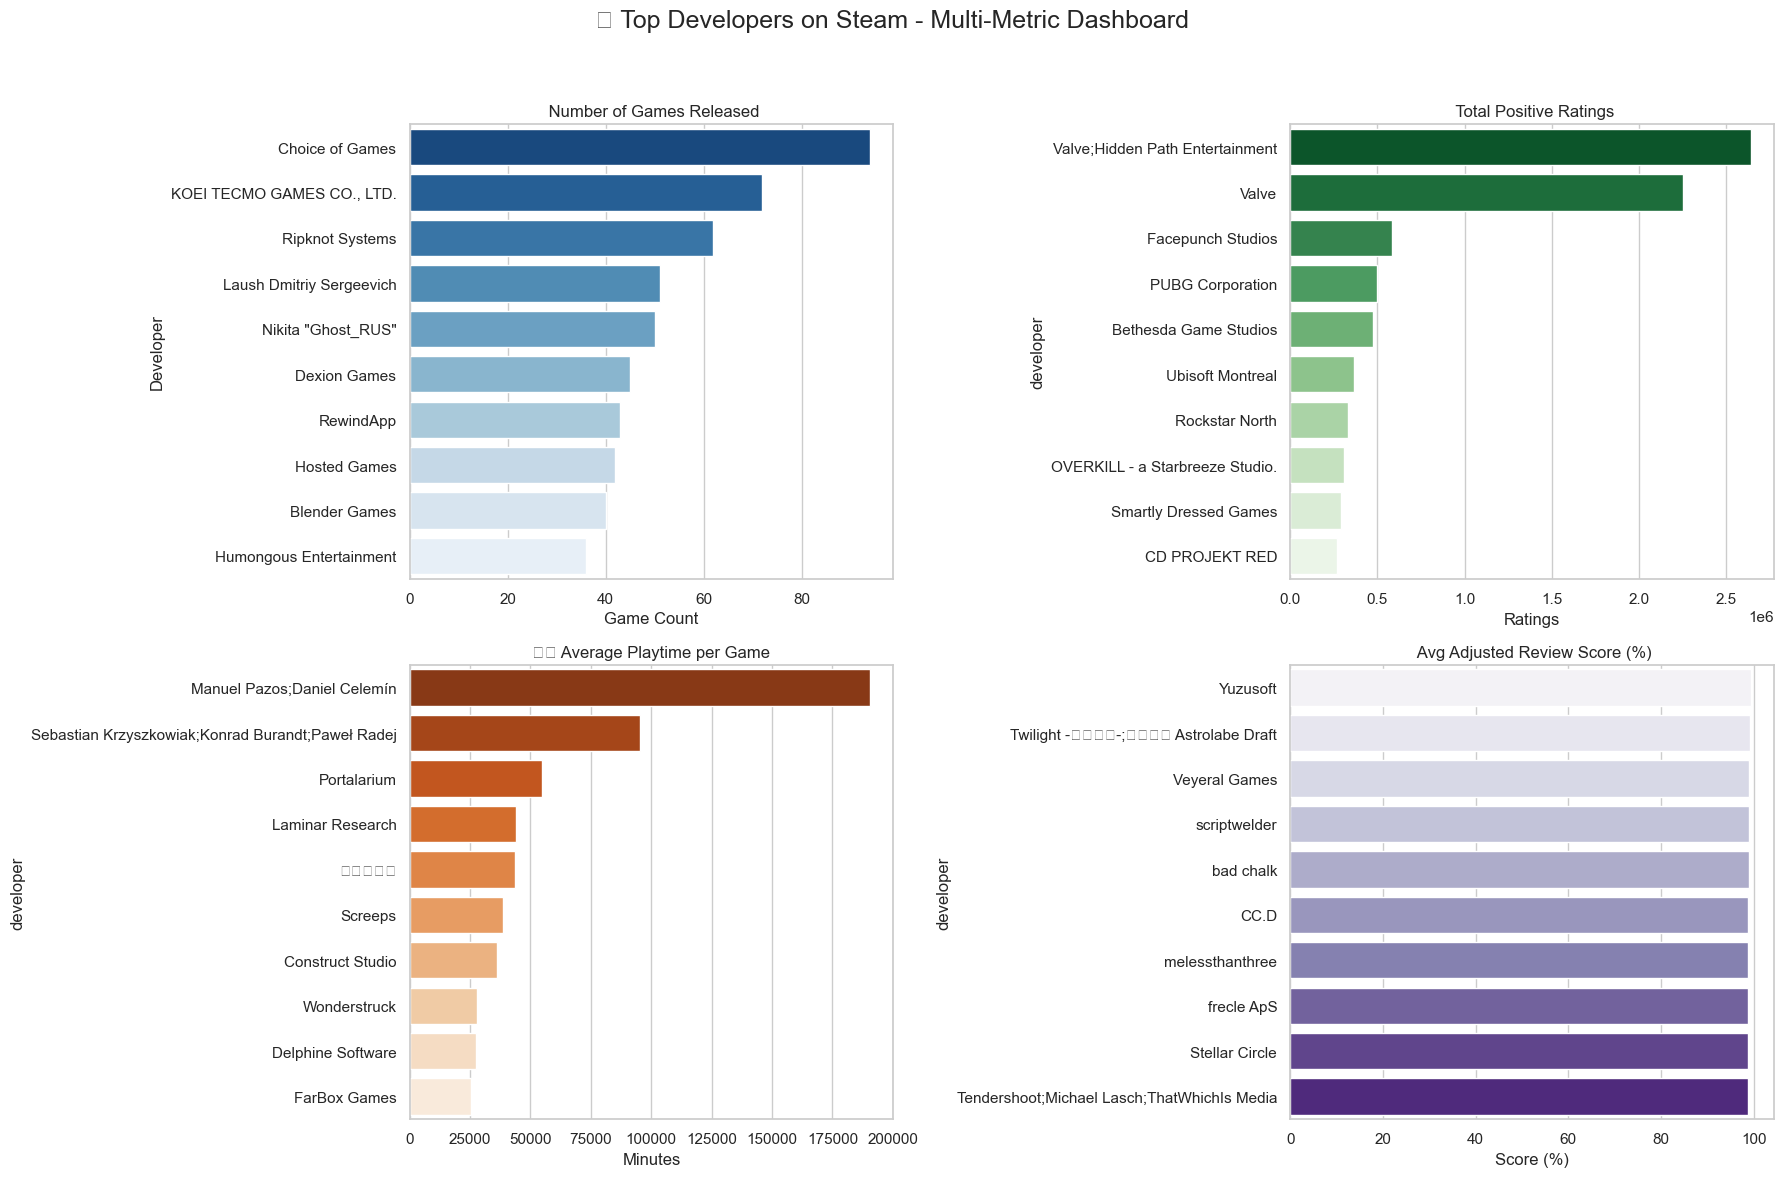

In [222]:

df_dev = df.dropna(subset=['developer'])


fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("🎮 Top Developers on Steam - Multi-Metric Dashboard", fontsize=18)


top_devs = df_dev['developer'].value_counts().head(10)
sns.barplot(x=top_devs.values, y=top_devs.index, ax=axs[0, 0], palette='Blues_r')
axs[0, 0].set_title(" Number of Games Released")
axs[0, 0].set_xlabel("Game Count")
axs[0, 0].set_ylabel("Developer")

top_by_rating = df_dev.groupby('developer')['positive_ratings'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_by_rating.values, y=top_by_rating.index, ax=axs[0, 1], palette='Greens_r')
axs[0, 1].set_title(" Total Positive Ratings")
axs[0, 1].set_xlabel("Ratings")


top_by_play = df_dev.groupby('developer')['average_playtime'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_by_play.values, y=top_by_play.index, ax=axs[1, 0], palette='Oranges_r')
axs[1, 0].set_title("⏱️ Average Playtime per Game")
axs[1, 0].set_xlabel("Minutes")

if 'adjusted_score' in df.columns:
    top_by_score = df_dev.groupby('developer')['adjusted_score'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=top_by_score.values * 100, y=top_by_score.index, ax=axs[1, 1], palette='Purples')
    axs[1, 1].set_title(" Avg Adjusted Review Score (%)")
    axs[1, 1].set_xlabel("Score (%)")
else:
    axs[1, 1].text(0.5, 0.5, "adjusted_score not found", ha='center')
    axs[1, 1].set_title(" Avg Adjusted Review Score (%)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [171]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\4256593764.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\4256593764.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\4256593764.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\4256593764.py:55: UserWarning:

Glyph 31048 (\N{CJK UNIFIED IDEOGRAPH-7948}) missing from font(s) Arial.

C:\Users\AYUSH JOSHI THAYYIL\

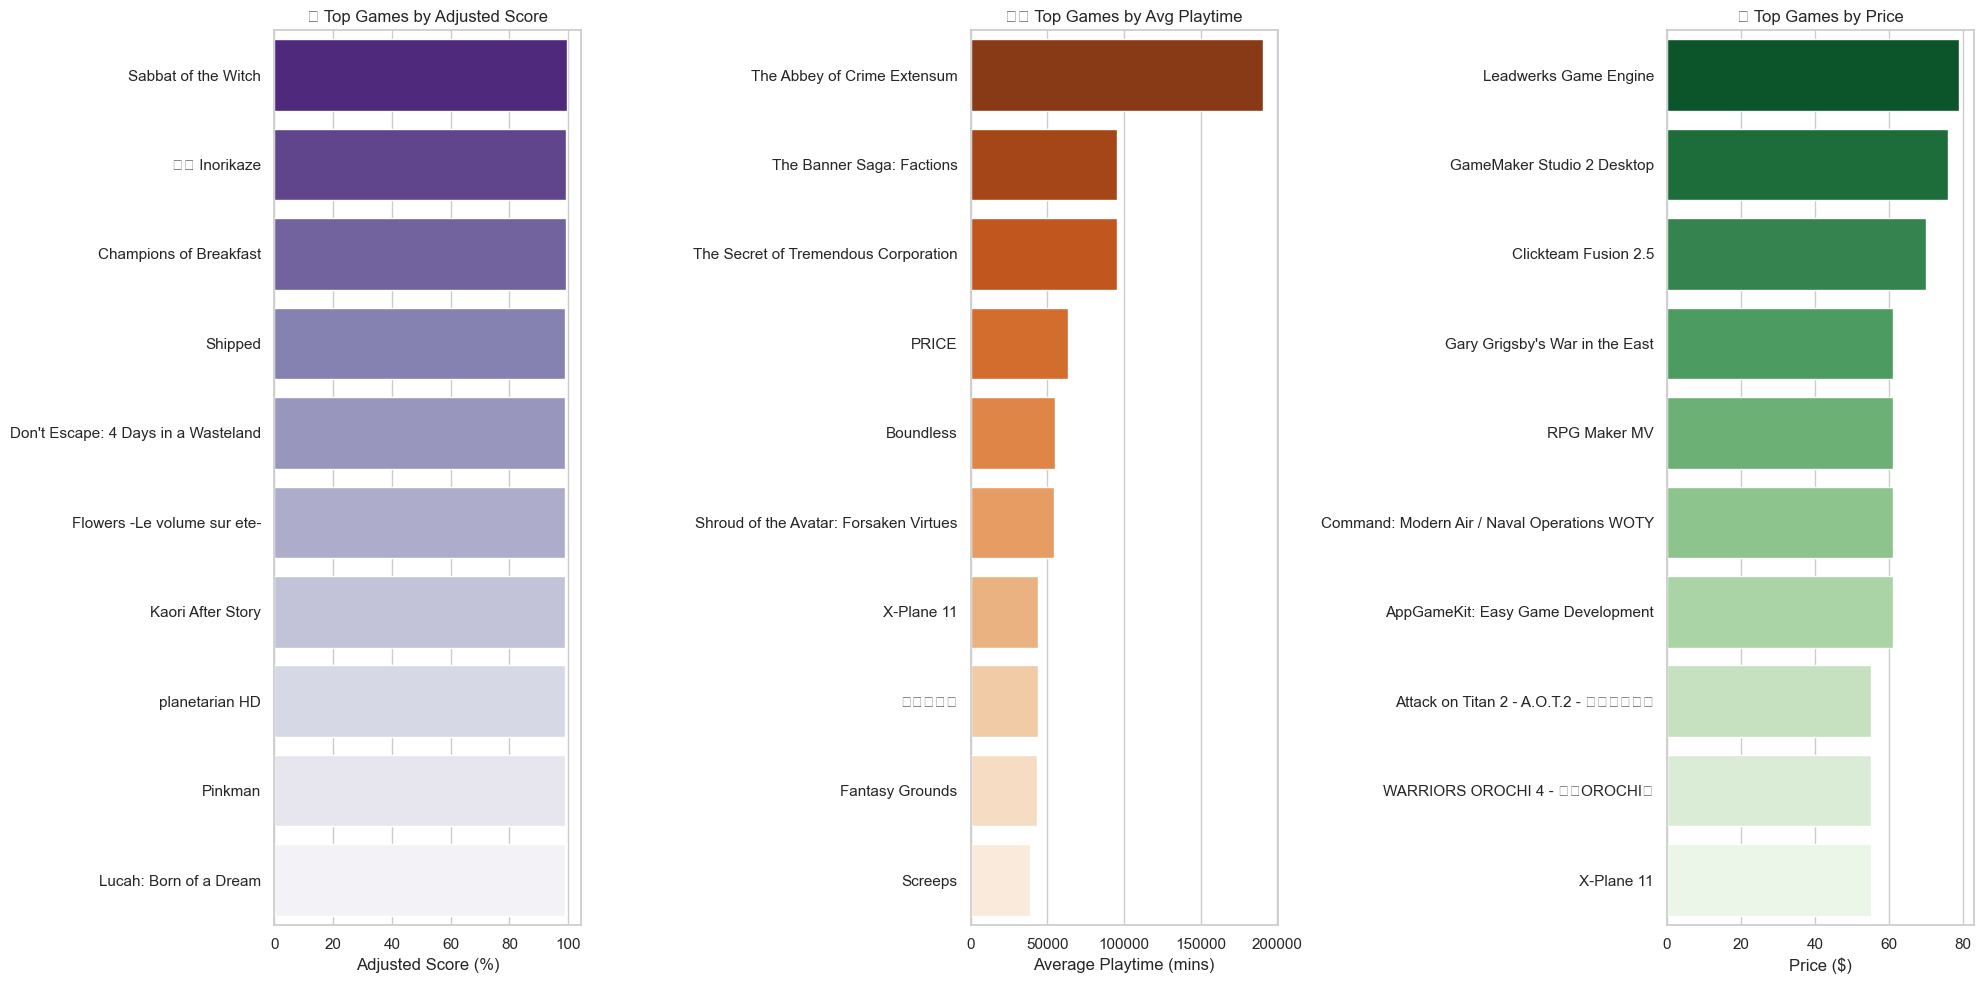

In [188]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [189]:

centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

for i, center in enumerate(centers_pca):
    fig.add_scatter(x=[center[0]], y=[center[1]],
                    mode='markers+text',
                    text=[f'Center {i}'],
                    marker=dict(size=12, color='black'),
                    textposition='top center')


In [212]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import numpy as np


features = ['price', 'average_playtime', 'adjusted_score']
df_clean = df[features].dropna()


Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_outliers)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_no_outliers['pca1'] = X_pca[:, 0]
df_no_outliers['pca2'] = X_pca[:, 1]


kmeans = KMeans(n_clusters=4, random_state=42)
df_no_outliers['cluster'] = kmeans.fit_predict(X_scaled)


fig = px.scatter(
    df_no_outliers,
    x='pca1', y='pca2',
    color=df_no_outliers['cluster'].astype(str),
    title=' Game Clusters (Outliers Removed)',
    opacity=0.8,
    template='plotly_white'
)


fig.update_traces(marker=dict(size=6, opacity=0.6))
fig.update_layout(
    coloraxis=dict(colorscale=['#FF6B6B', '#6A4C93', '#1E88E5', '#00C49A']),
    legend_title_text='Cluster'
)
fig.show()


C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\3878711345.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\3878711345.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Temp\ipykernel_44824\3878711345.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [213]:
import plotly.express as px

fig = px.scatter_3d(
    df, 
    x='price', 
    y='average_playtime', 
    z='adjusted_score', 
    color='cluster',  # or 'genre_list', 'developer', etc.
    hover_name='name',
    title="3D Relationship Between Price, Playtime, and Score"
)
fig.show()


In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly.express as px


features = ['price_norm', 'average_playtime_norm', 'adjusted_score']
df_clean = df[features + ['name']].dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])


kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)
entroids = scaler.inverse_transform(kmeans.cluster_centers_)


fig = go.Figure()


for cluster_id in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_id]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['price_norm'],
        y=cluster_data['average_playtime_norm'],
        z=cluster_data['adjusted_score'],
        mode='markers',
        marker=dict(size=4),
        name=f"Cluster {cluster_id}",
        text=cluster_data['name']
    ))

fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers+text',
    marker=dict(size=10, color='black', symbol='diamond'),
    text=[f"Centroid {i}" for i in range(len(centroids))],
    textposition="top center",
    name='Centroids'
))


fig.update_layout(
    scene=dict(
        xaxis_title='price_norm',
        yaxis_title='average_playtime_norm',
        zaxis_title='Adjusted Score'
    ),
    title=" KMeans Clusters with Centroids in 3D",
    legend_title="Cluster"
)

fig.show()
# here we are using adjusted score ,  normalized price, and normalized  playtime 

In [215]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['price', 'average_playtime', 'adjusted_score']]  
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(features_scaled)

score = silhouette_score(features_scaled, labels)
print(f"Silhouette Score: {score:.3f}")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

features = df[['price', 'average_playtime', 'adjusted_score']] 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# STEP 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
labels = dbscan.fit_predict(features_scaled)


core_samples_mask = labels != -1
if len(set(labels)) - (1 if -1 in labels else 0) > 1:
    score = silhouette_score(features_scaled[core_samples_mask], labels[core_samples_mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
else:
    print("DBSCAN found less than 2 clusters. Silhouette score not meaningful.")


Silhouette Score: 0.455
Silhouette Score (excluding noise): 0.560


In [216]:
# we can see that the silhoutte sxcore is 0.455 that is it is  a moderately clustered structure 
# therefore lets use dbscan her for clustering
# silhoutte score now is 0.560 which is also moderate

C:\Users\AYUSH JOSHI THAYYIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.



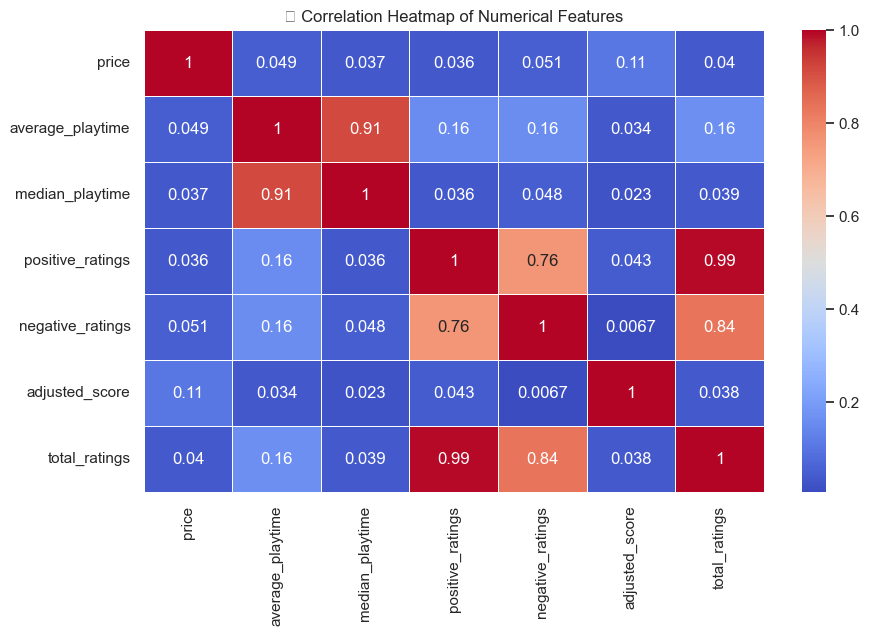

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = ['price', 'average_playtime', 'median_playtime', 'positive_ratings', 'negative_ratings', 'adjusted_score', 'total_ratings']
df_corr = df[num_cols].dropna()


corr_matrix = df_corr.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Numerical Features")
plt.show()


In [218]:
#This  is  a  correlation heatmap, which showshow much a parameter is afftected by another parameter , 
#for exmplae from the heatmap we can say that adjusted score barely gets affectd by any of the other parameters
# redder the box more the dependency , bluer the box   lesser the dependency

In [219]:
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher              platforms  \
0                   Valve                 Valve  [windows, mac, linux]   
1                   Valve                 Valve  [windows, mac, linux]   
2                   Valve                 Valve  [windows, mac, linux]   
3                   Valve                 Valve  [windows, mac, linux]   
4        Gearbox Software                 Valve  [windows, mac, linux]   
...                   ...                   ...                    ...   
27070         SHEN JIAWEI           SHEN JIAWEI              [windows]   
27071      Semyon Maximov      BekkerDev Studio              [windows]   
27072         EntwicklerX           EntwicklerX              [windows]   
27073  Yustas Game Studio  Alawar Entertainment         [windows, mac]   
27074    Adept Studios GD  Alawar Entertainment         [windows, mac]   

       required_age  categories  genres                 steamspy_tags  \
0                 0         NaN     NaN        Action;FPS;Multiplayer   
1                 0         NaN     NaN        Action;FPS;Multiplayer   
2                 0         NaN     NaN  FPS;World War II;Multiplayer   
3                 0         NaN     NaN        Action;FPS;Multiplayer   
4                 0         NaN     NaN             FPS;Action;Sci-fi   
...             ...         ...     ...                           ...   
27070             0         NaN     NaN        Adventure;Indie;Casual   
27071             0         NaN     NaN        Action;Indie;Adventure   
27072             0         NaN     NaN           Action;Indie;Casual   
27073             0         NaN     NaN        Indie;Casual;Adventure   
27074             0         NaN     NaN        Indie;Casual;Adventure   

       achievements  positive_ratings  negative_ratings  average_playtime  \
0                 0            124534              3339             17612   
1                 0              3318               633               277   
2                 0              3416               398               187   
3                 0              1273               267               258   
4                 0              5250               288               624   
...             ...               ...               ...               ...   
27070             7                 3                 0                 0   
27071             0                 8                 1                 0   
27072            24                 0                 1                 0   
27073             0                 2                 0                 0   
27074             0                 4                 0                 0   

       median_playtime             owners  price  release_year  release_month  \
0                  317  10000000-20000000   7.19          2000             11   
1                   62   5000000-10000000   3.99          1999              4   
2                   34   5000000-10000000   3.99          2003              5   
3                  184   5000000-10000000   3.99          2001              6   
4                  415   5000000-10000000   3.99          1999             11   
...            